### Skill 8
### Name : Shraddha Pawar
### Batch : ML 18
### Title : Forecast Coco cola sales price using time series analysis model

### Problem statement : - Forecast Coco cola sales price using time series analysis models.

In [1]:
#Importing all necesary libraries

import pandas as pd                                    
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  

In [2]:
import warnings

warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

In [3]:
#Read dataset

df=pd.read_csv('KO.csv',parse_dates=['Date'],index_col="Date")
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-11,49.220001,49.959999,49.000000,49.349998,47.837646,15285100
2020-04-11,49.430000,50.209999,49.080002,49.169998,47.663158,12930800
2020-05-11,49.759998,50.209999,49.340000,49.439999,47.924885,12452400
2020-06-11,49.650002,49.990002,49.250000,49.450001,47.934582,9294900
2020-09-11,52.500000,53.259998,52.070000,52.570000,50.958965,33442000
...,...,...,...,...,...,...
2021-10-27,55.970001,56.080002,55.270000,55.520000,55.520000,24019800
2021-10-28,55.750000,56.110001,55.619999,56.040001,56.040001,15928000
2021-10-29,55.869999,56.470001,55.779999,56.369999,56.369999,24460800


In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-11,49.220001,49.959999,49.000000,49.349998,47.837646,15285100
2020-04-11,49.430000,50.209999,49.080002,49.169998,47.663158,12930800
2020-05-11,49.759998,50.209999,49.340000,49.439999,47.924885,12452400
2020-06-11,49.650002,49.990002,49.250000,49.450001,47.934582,9294900
2020-09-11,52.500000,53.259998,52.070000,52.570000,50.958965,33442000


In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-10-27,55.970001,56.080002,55.270000,55.520000,55.520000,24019800
2021-10-28,55.750000,56.110001,55.619999,56.040001,56.040001,15928000
2021-10-29,55.869999,56.470001,55.779999,56.369999,56.369999,24460800
2021-01-11,56.389999,56.400002,55.900002,56.169998,56.169998,11651100
2021-02-11,56.470001,56.500000,55.970001,56.099998,56.099998,11498400


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-03-11 to 2021-02-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       252 non-null    float64
 1   High       252 non-null    float64
 2   Low        252 non-null    float64
 3   Close      252 non-null    float64
 4   Adj Close  252 non-null    float64
 5   Volume     252 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


In [7]:
df.shape

(252, 6)

In [8]:
df.isna().sum()   

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
# X variable

X=df[["Volume"]]

<AxesSubplot:xlabel='Date'>

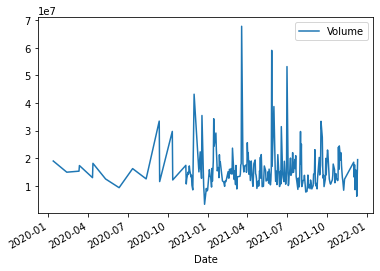

In [10]:
# Plot the time series data

X.plot()

In [11]:
# Checking stationarity of the dataset using AD Fuller test

from statsmodels.tsa.stattools import adfuller
res=adfuller(X)
p_val=res[1]
if p_val>0.05:
  print("Not Stationary")
else:
  print("Stationary")

Stationary


The data is stationary.

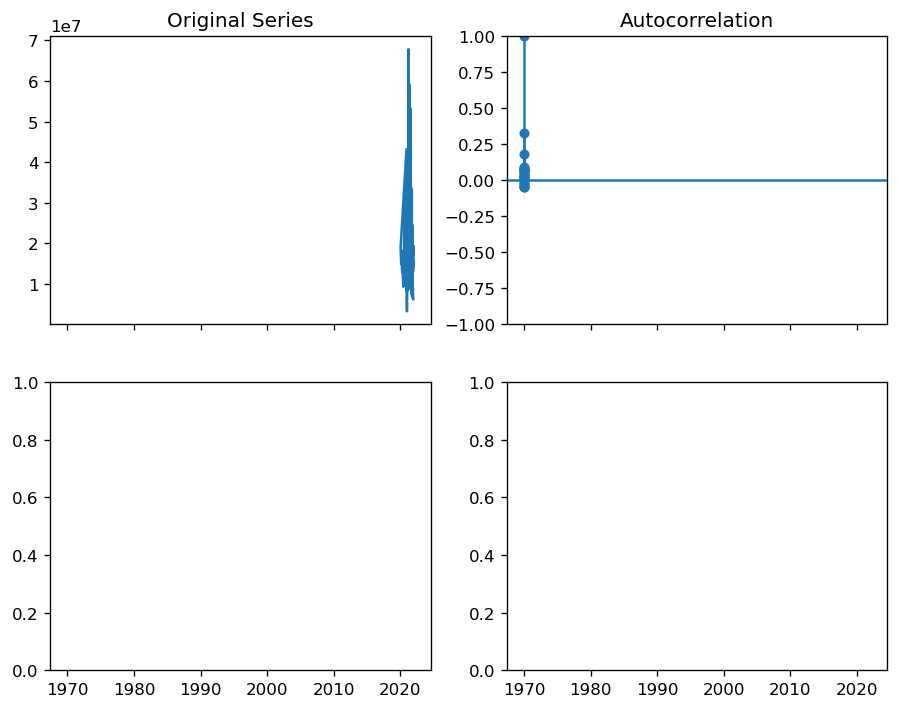

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

fig, axes = plt.subplots(2, 2, sharex=True)
axes[0, 0].plot(df.Volume); axes[0, 0].set_title('Original Series')
plot_acf(df.Volume, ax=axes[0, 1])

# 1st Differencing
#axes[1, 0].plot(df.Volume.diff()); axes[1, 0].set_title('1st Order Differencing')
#plot_acf(df.Volume.diff().dropna(), ax=axes[1, 1])

plt.show()

C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


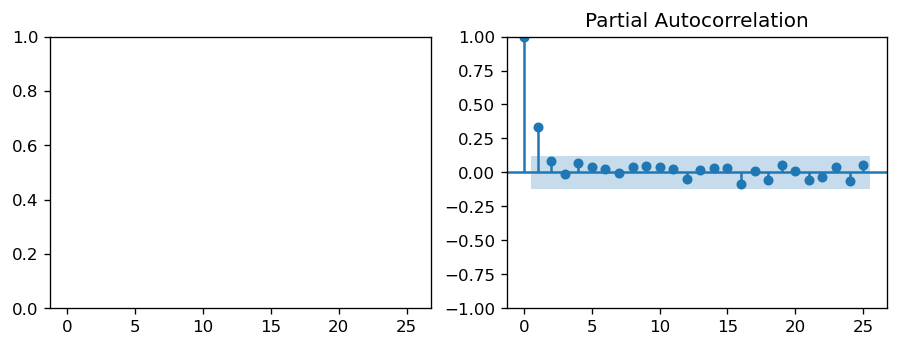

In [13]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[1].set(ylim=(0,5))
plot_pacf(df.Volume.dropna(), ax=axes[1])

plt.show()

In [14]:
from statsmodels.tsa.arima.model import ARIMA

# ARIMA Model
model = ARIMA(df.Volume, order=(2,0,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                 Volume   No. Observations:                  252
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -4328.545
Date:                Sun, 07 Nov 2021   AIC                           8667.091
Time:                        22:14:26   BIC                           8684.738
Sample:                             0   HQIC                          8674.192
                                - 252                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.559e+07   7.47e+05     20.855      0.000    1.41e+07    1.71e+07
ar.L1         -0.2140      0.712     -0.301      0.764      -1.609       1.181
ar.L2          0.2481      0.233      1.067      0.2

C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:597: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:597: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignor

In [15]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df.Volume[:150]
test = df.Volume[150:]
train.shape,test.shape

X=df[["Volume"]]
start=len(train)
end=len(X)-1
print(start,end)
ypred_test=model_fit.predict(start=start,end=end)

150 251


In [16]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

print("RMSE is ",np.sqrt(mean_squared_error(test,ypred_test)))

RMSE is  4445804.904020391


In [17]:
# ARIMA Model
model = ARIMA(df.Volume, order=(1,0,1))
model_fit1 = model.fit()
print(model_fit1.summary())

                               SARIMAX Results                                
Dep. Variable:                 Volume   No. Observations:                  252
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -4328.762
Date:                Sun, 07 Nov 2021   AIC                           8665.524
Time:                        22:14:27   BIC                           8679.642
Sample:                             0   HQIC                          8671.205
                                - 252                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.559e+07   7.84e+05     19.883      0.000    1.41e+07    1.71e+07
ar.L1          0.5419      0.225      2.410      0.016       0.101       0.983
ma.L1         -0.2401      0.244     -0.985      0.3

C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:597: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:597: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignor

In [18]:
ypred_test1=model_fit1.predict(start=start,end=end)
print("RMSE is ",np.sqrt(mean_squared_error(test,ypred_test1)))

RMSE is  4441171.550827966


In [19]:
# ARIMA Model
model = ARIMA(df.Volume, order=(1,0,0))
model_fit2 = model.fit()
print(model_fit2.summary())

                               SARIMAX Results                                
Dep. Variable:                 Volume   No. Observations:                  252
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -4329.570
Date:                Sun, 07 Nov 2021   AIC                           8665.141
Time:                        22:14:27   BIC                           8675.729
Sample:                             0   HQIC                          8669.401
                                - 252                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.559e+07   6.86e+05     22.720      0.000    1.42e+07    1.69e+07
ar.L1          0.3296      0.039      8.365      0.000       0.252       0.407
sigma2      4.922e+13      0.270   1.82e+14      0.0

C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:597: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:597: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignor

In [20]:
ypred_test2=model_fit2.predict(start=start,end=end)
print("RMSE is ",np.sqrt(mean_squared_error(test,ypred_test2)))

RMSE is  4521845.240708578


In [21]:
# ARIMA Model
model = ARIMA(df.Volume, order=(1,0,2))
model_fit3 = model.fit()
print(model_fit3.summary())

C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:597: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:597: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignor

                               SARIMAX Results                                
Dep. Variable:                 Volume   No. Observations:                  252
Model:                 ARIMA(1, 0, 2)   Log Likelihood               -4328.749
Date:                Sun, 07 Nov 2021   AIC                           8667.499
Time:                        22:14:27   BIC                           8685.146
Sample:                             0   HQIC                          8674.600
                                - 252                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.559e+07   8.08e+05     19.290      0.000     1.4e+07    1.72e+07
ar.L1          0.6786      0.267      2.543      0.011       0.156       1.202
ma.L1         -0.3824      0.267     -1.430      0.1

In [22]:
ypred_test3=model_fit3.predict(start=start,end=end)
print("RMSE is ",np.sqrt(mean_squared_error(test,ypred_test3)))

RMSE is  4424722.957055444


In [23]:
# ARIMA Model
model = ARIMA(df.Volume, order=(1,1,1))
model_fit4 = model.fit()
print(model_fit4.summary())

                               SARIMAX Results                                
Dep. Variable:                 Volume   No. Observations:                  252
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4315.669
Date:                Sun, 07 Nov 2021   AIC                           8637.338
Time:                        22:14:27   BIC                           8647.915
Sample:                             0   HQIC                          8641.595
                                - 252                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3040      0.044      6.883      0.000       0.217       0.391
ma.L1         -0.9741      0.021    -45.647      0.000      -1.016      -0.932
sigma2      5.608e+13   1.12e-16   5.02e+29      0.0

C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:597: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:597: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignor

In [24]:
ypred_test4=model_fit4.predict(start=start,end=end)
print("RMSE is ",np.sqrt(mean_squared_error(test,ypred_test4)))

RMSE is  4434226.294081687


### Conclusion

The best model is ARIMA(1,0,2) with minimum RMSE.

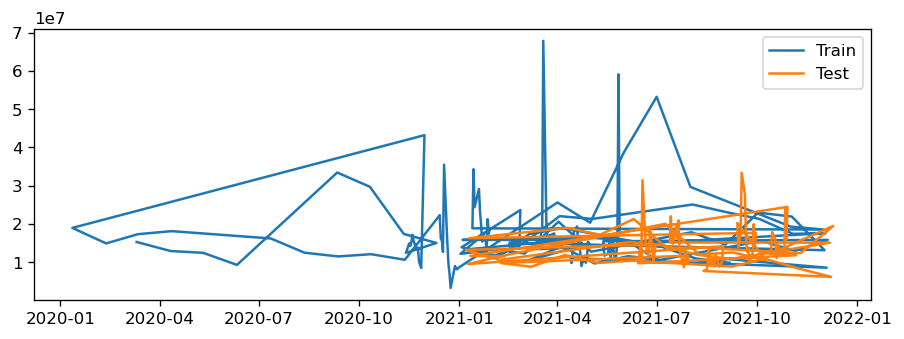

In [25]:
plt.plot(train ,label="Train")
plt.plot(test,label="Test")
plt.legend()

<AxesSubplot:xlabel='Date'>

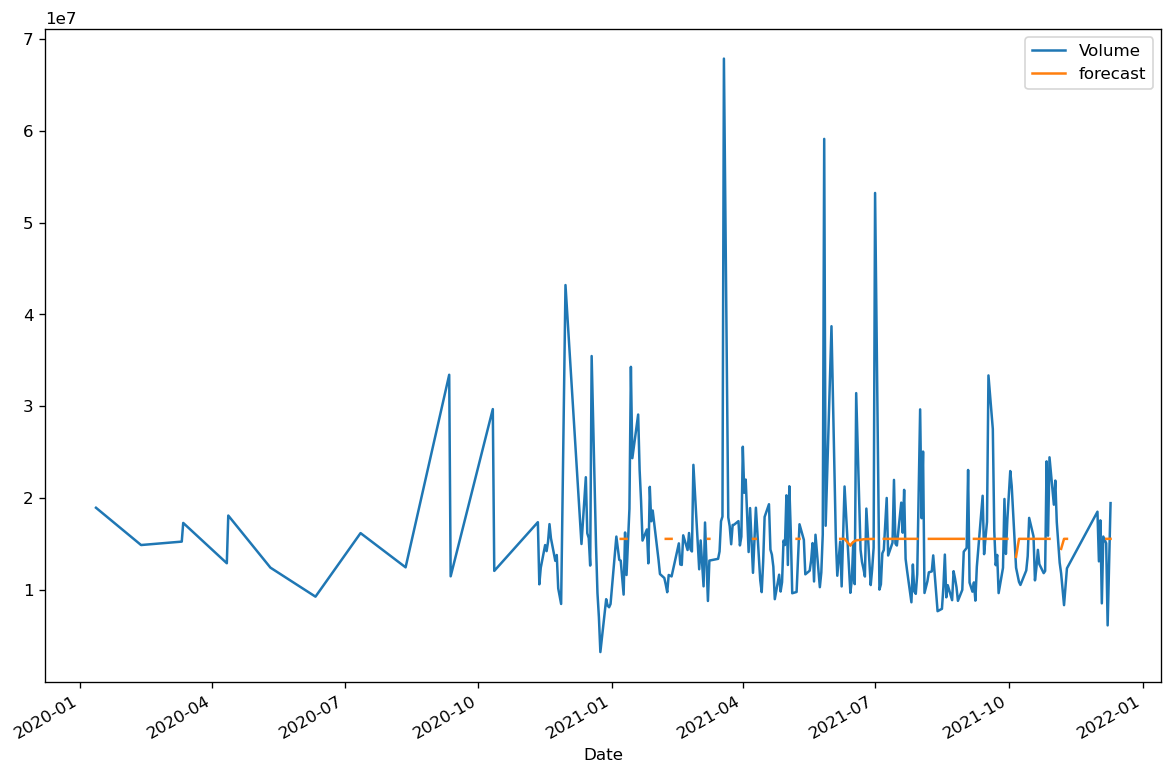

In [30]:
df['forecast']=model_fit3.predict(start=start,end=end,dynamic=True)
df[['Volume','forecast']].plot(figsize=(12,8))